In [41]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm

In [42]:
def weight_init(method, N, tickers):
    if method == 'equal':
        w = np.ones(N) / N
    
    elif method == 'marketcap':
        caps =  pd.read_csv('marketcapdata.csv', index_col='Name').loc[tickers]
        w = (caps / caps.sum()).to_numpy().flatten()
        
    return w

In [43]:
def expo_gradient(x, w, eta, alpha):
    """Take in a vector of price relatives and weights and output updated weights
    Parameters
    x (np.array) - vector of price relatives, N x 1
    w (np.array) - vector of weights, N x 1
    eta (float) - learning rate
    
    Return:
    w (np.array) - updated weights
    """
    w = w * np.exp(eta * x / (w @ x)) / (w * np.exp(eta * x / (w @ x))).sum()
    return w

In [44]:
def expo_gradient2(x, w, eta, alpha):
    """Take in a vector of price relatives and weights and output updated weights
    Parameters
    x (np.array) - vector of price relatives, N x 1
    w (np.array) - vector of weights, N x 1
    eta (float) - learning rate
    alpha (float) - parameter
    
    Return:
    w (np.array) - updated weights
    """
    x = (1 - alpha / x.size) * x  + (alpha / x.size) * np.ones(x.size)
    w = w * np.exp(eta * x / (w @ x)) / (w * np.exp(eta * x / (w @ x))).sum()
    #w = (1 - alpha / w.size) * w  + (alpha / w.size) * np.ones(w.size)
    return w

In [51]:
def run(filename, weight_update=expo_gradient2, method='equal'):
    data = pd.read_excel(filename, index_col=0).sort_index()
    opening = data[data.columns[::2]].rename(columns=lambda x: x[:-5])
    price_rel = (opening.shift(-1) / opening).fillna(1)
    
    N = price_rel.shape[1]
    T = price_rel.shape[0]

    tickers = price_rel.columns
    w = weight_init(method, N, tickers)
    
    weights = pd.DataFrame(columns=tickers, index=price_rel.index[:-1])
    value = pd.DataFrame(index=price_rel.index, columns=['Value'])
    value.iloc[0] = 1
    
    alpha = (N**2 * np.log(N) / ((8 * T)))**0.25
    eta = np.sqrt(8 * alpha**2 * np.log(N) / (N**2 / T))
    
    for idx, x in price_rel[:-1].iterrows():
        w = weight_update(x, w, eta, alpha)
        weights.loc[idx] = w
        value.iloc[price_rel.index.get_loc(idx) + 1] = value.iloc[price_rel.index.get_loc(idx)] * np.dot(w,x)
        
    value.to_csv('Results/expo_'+filename[:-5])
        
    return weights, value

In [46]:
def market(filename):
    market = pd.read_excel(filename,index_col=0)[::-1].dropna()
    price_rel = (market.shift(-1) / market)[['SPX_open']]
    market_value = pd.DataFrame(index=price_rel.index, columns=['SPX_open'])
    market_value.iloc[0] = 1

    for idx, x in price_rel[:-1].iterrows():
        market_value.iloc[price_rel.index.get_loc(idx) + 1] = market_value.iloc[price_rel.index.get_loc(idx)] * price_rel.loc[idx]
    
    return market_value

In [7]:
market_h = market('market_hourly.xlsx')
market_d = market('market_daily.xlsx')
market_w = market('market_weekly.xlsx')

In [52]:
weights_hh, value_hh = run('highvol_hourly.xlsx')
weights_hd, value_hd = run('highvol_daily.xlsx')
weights_hw, value_hw = run('highvol_weekly.xlsx')

In [48]:
weights_lh, value_lh = run('lowvol_hourly.xlsx', expo_gradient2, 'equal')
weights_ld, value_ld = run('lowvol_daily.xlsx', expo_gradient2, 'equal')
weights_lw, value_lw = run('lowvol_weekly.xlsx', expo_gradient2, 'equal')

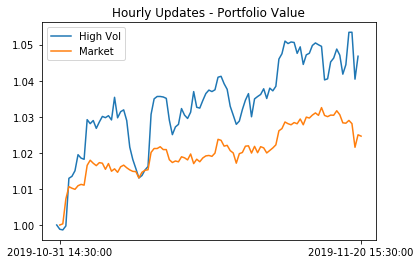

In [38]:
plt.plot(value_hh, label='High Vol')
#plt.plot(value_lh, label='Low Vol')
plt.plot(market_h, label='Market')
plt.xticks([market_h.index.min(), market_h.index.max()])
plt.title('Hourly Updates - Portfolio Value')
plt.legend(loc=2)
plt.show()

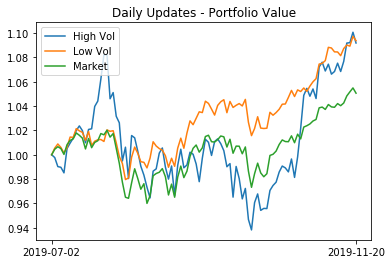

In [39]:
plt.plot(value_hd, label='High Vol')
plt.plot(value_ld, label='Low Vol')
plt.plot(market_d, label='Market')
plt.xticks([market_d.index.min(), market_d.index.max()])
plt.legend(loc=2)
plt.title('Daily Updates - Portfolio Value')
plt.show()

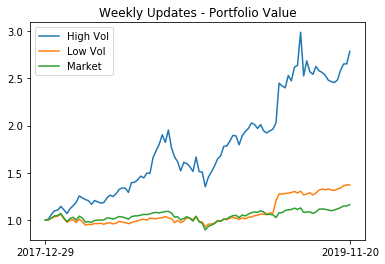

In [40]:
plt.plot(value_hw, label='High Vol')
plt.plot(value_lw, label='Low Vol')
plt.plot(market_w, label='Market')
plt.xticks([market_w.index.min(), market_w.index.max()])
plt.legend(loc=2)
plt.title('Weekly Updates - Portfolio Value')
plt.show()

In [50]:
volume

,Value
2019-08-28 09:30:00,1
2019-08-28 10:30:00,1.00256
2019-08-28 11:30:00,1.01361
2019-08-28 12:30:00,1.01575
2019-08-28 13:30:00,1.015
2019-08-28 14:30:00,1.01495
2019-08-28 15:30:00,1.01538
2019-08-29 09:30:00,1.02999
2019-08-29 10:30:00,1.03168
2019-08-29 11:30:00,1.03413
